In [1]:
%load_ext autoreload
%autoreload 2

# 1.0 Imports & Config

In [69]:
import sys
import os

# Adiciona a pasta src ao sys.path
sys.path.append(os.path.abspath('../src'))

# Imports dos seus módulos
from data_io import load_raw
from eda import (full_dtypes, describe_missing, unique_summary, clean_basic, plot_numeric_distribution, plot_numeric_vs_target,
plot_categorical_distribution, plot_categorical_vs_target, plot_correlation_matrix)
from feature_engineering import add_telco_features, get_feature_lists, build_preprocessor
from model_runner import evaluate_models
from tuning_shap import find_best_threshold, tune_and_explain
import business_impact as bi
import joblib

In [5]:
RANDOM_STATE = 42

# 2.0 Data Load

In [9]:
DATA_PATH    = '/home/sidnei/repos/telco_churn_case/data/telco_churn_case_data.csv'  

In [10]:
df = load_raw(DATA_PATH)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3.0 Exploratory Data Analysis

In [18]:
display(describe_missing(df))
display(full_dtypes(df))
display(unique_summary(df))
df = clean_basic(df)

,missing,pct


,column,dtype
0,customerID,object
1,gender,object
2,SeniorCitizen,int64
3,Partner,object
4,Dependents,object
5,tenure,int64
6,PhoneService,object
7,MultipleLines,object
8,InternetService,object
9,OnlineSecurity,object


,column,dtype,n_unique,sample_values
0,customerID,object,7043,"7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW..."
1,TotalCharges,object,6531,"29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5,..."
2,MonthlyCharges,float64,1585,"29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, ..."
3,tenure,int64,73,"1, 34, 2, 45, 8, 22, 10, 28, 62, 13, …"
4,PaymentMethod,object,4,"Electronic check, Mailed check, Bank transfer ..."
5,StreamingMovies,object,3,"No, Yes, No internet service"
6,TechSupport,object,3,"No, Yes, No internet service"
7,OnlineBackup,object,3,"Yes, No, No internet service"
8,StreamingTV,object,3,"No, Yes, No internet service"
9,DeviceProtection,object,3,"No, Yes, No internet service"


# 4.0 Feature Engineering

In [19]:
df_feat = add_telco_features(df)
num_cols, cat_cols = get_feature_lists()

In [23]:
# 1. Key numerical and categorical columns after feature engineering
numeric_cols = [
    "tenure_months", "monthly_charge", "charge_tenure_ratio",
    "avg_charge_per_service", "services_count", "social_score"
]

categorical_cols = [
    "tenure_bin", "monthly_charge_bin", "contract_months", "is_monthly_contract",
    "has_partner", "has_dependents", "is_senior", "has_streaming_pkg",
    "has_online_pkg", "is_electronic_check", "is_automatic", "paperless_billing"
]

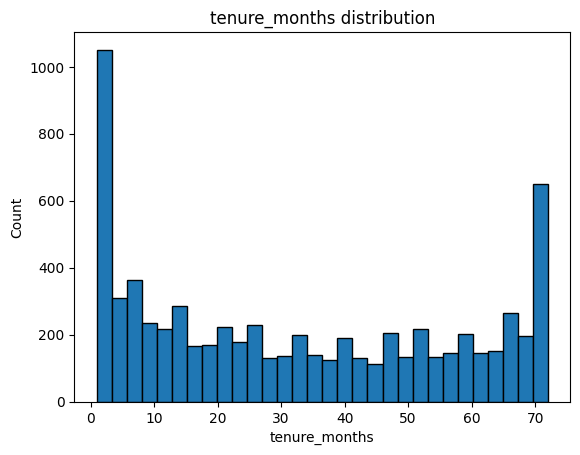

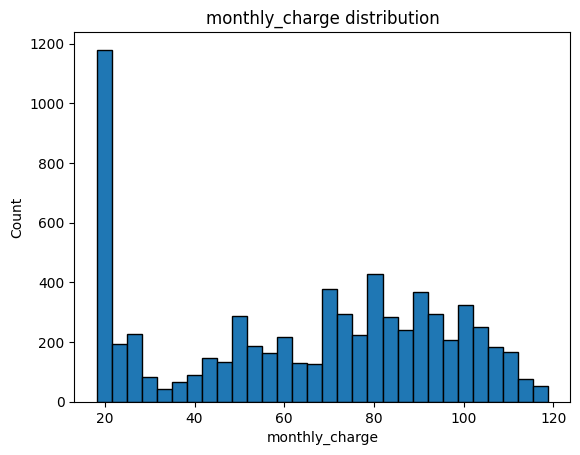

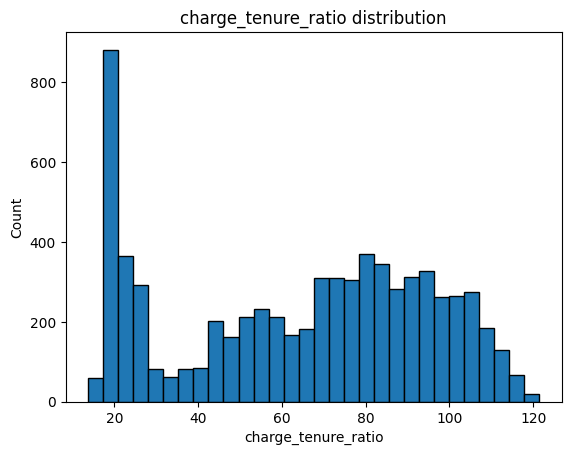

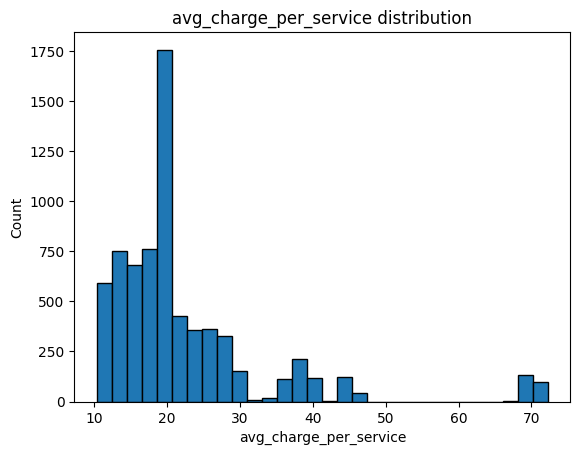

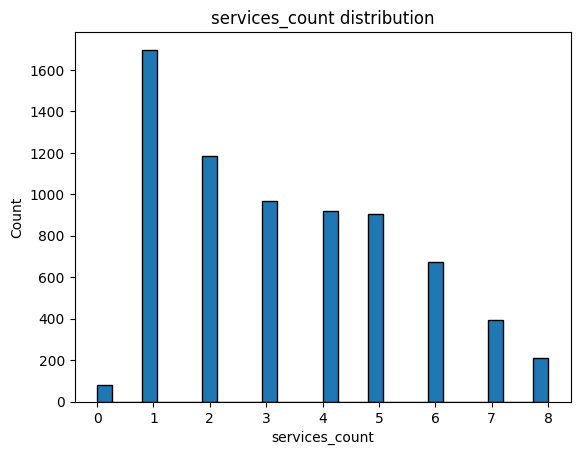

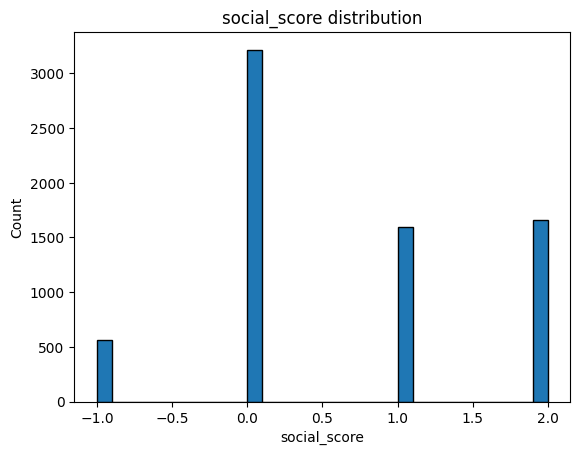

In [28]:
# 2. Distribution of engineered numerical features
plot_numeric_distribution(df_feat, numeric_cols)

<Figure size 640x480 with 0 Axes>

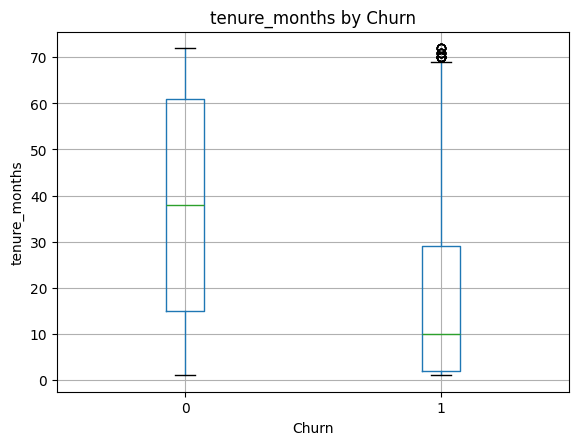

<Figure size 640x480 with 0 Axes>

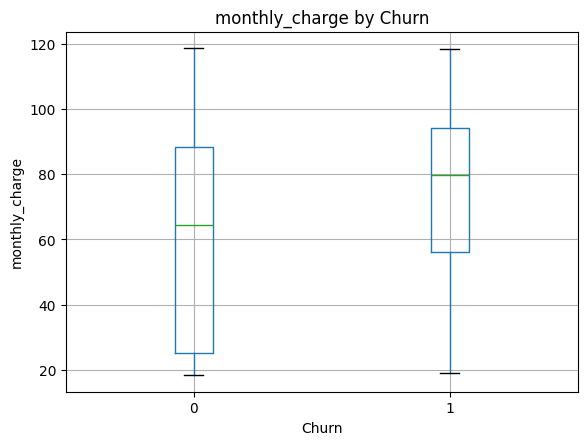

<Figure size 640x480 with 0 Axes>

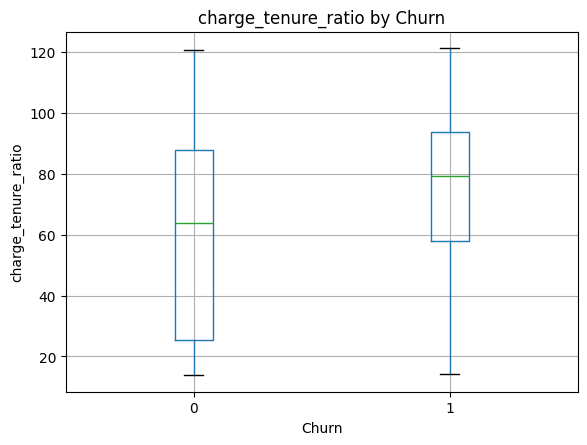

<Figure size 640x480 with 0 Axes>

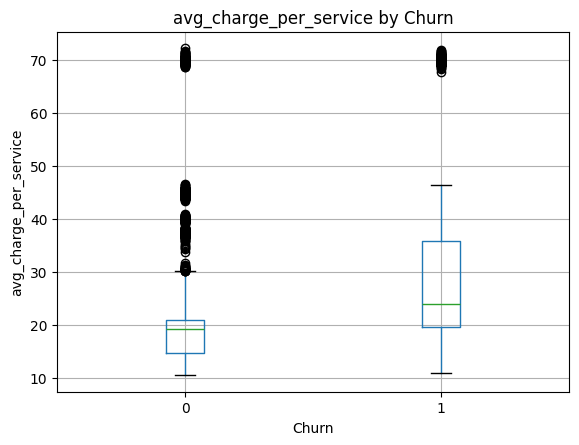

<Figure size 640x480 with 0 Axes>

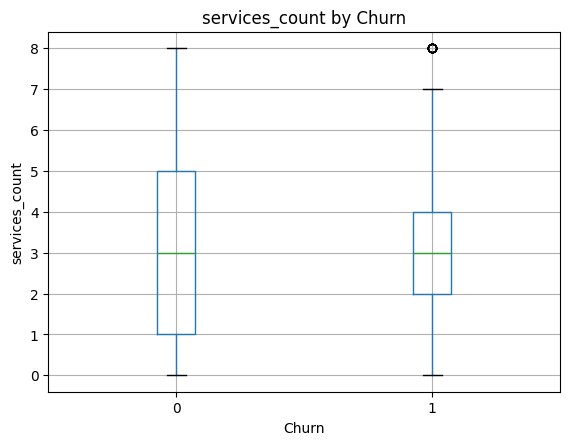

<Figure size 640x480 with 0 Axes>

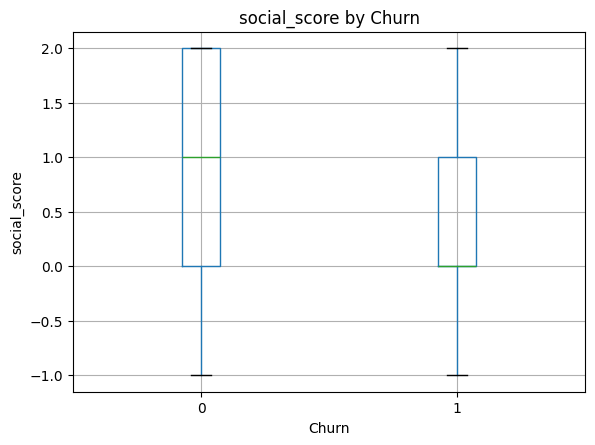

In [29]:
# 3. Boxplots of numerical features by churn
plot_numeric_vs_target(df_feat, numeric_cols, target="Churn")

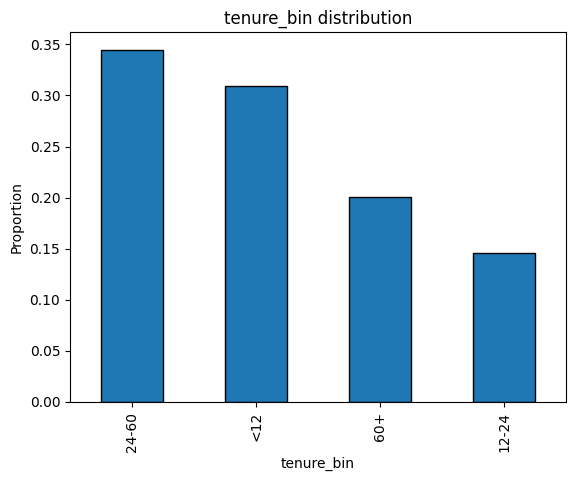

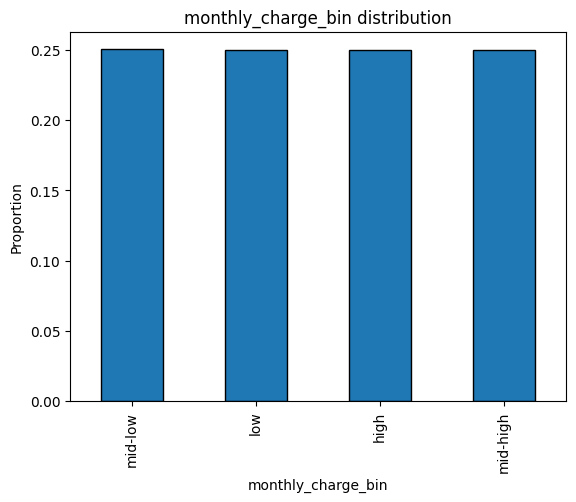

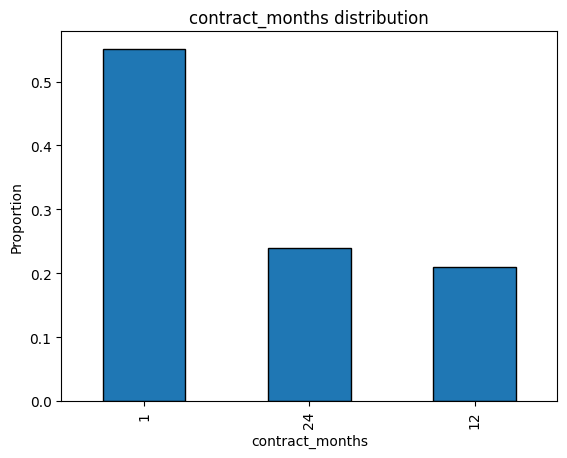

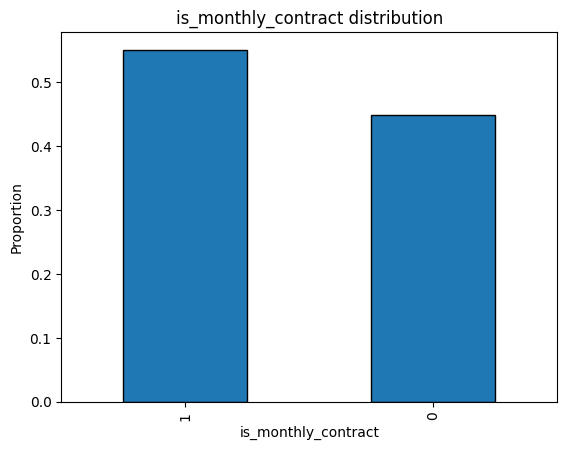

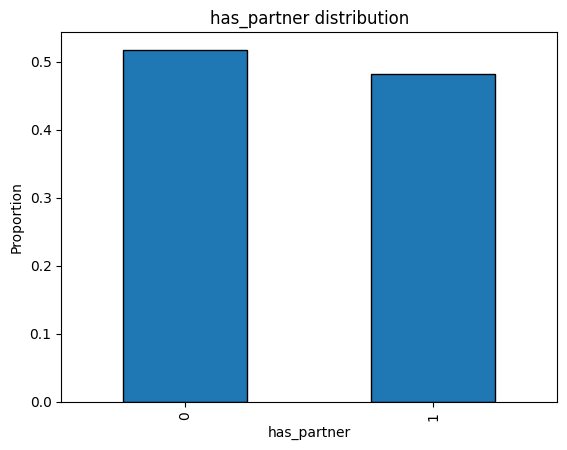

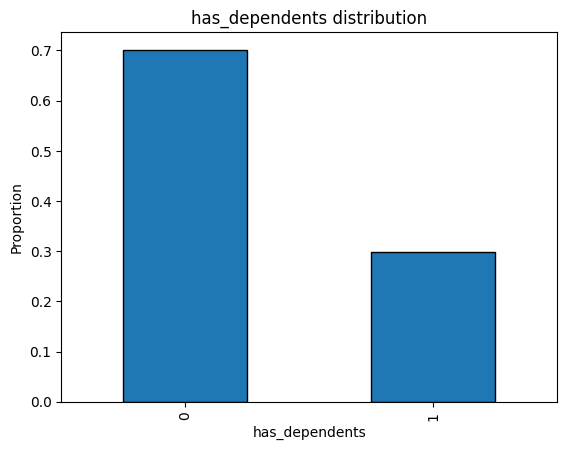

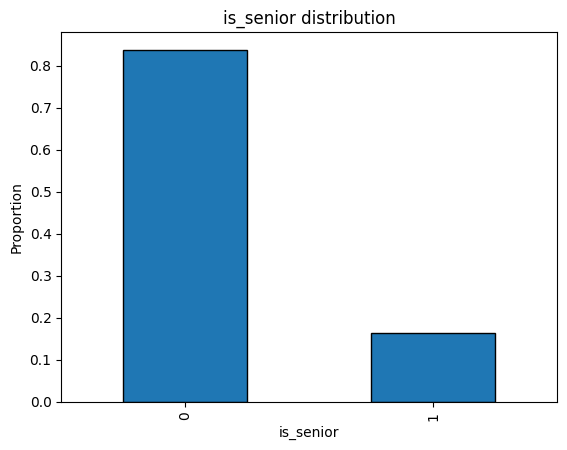

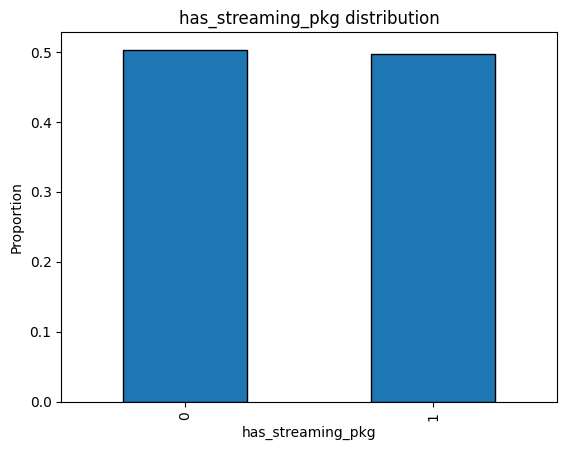

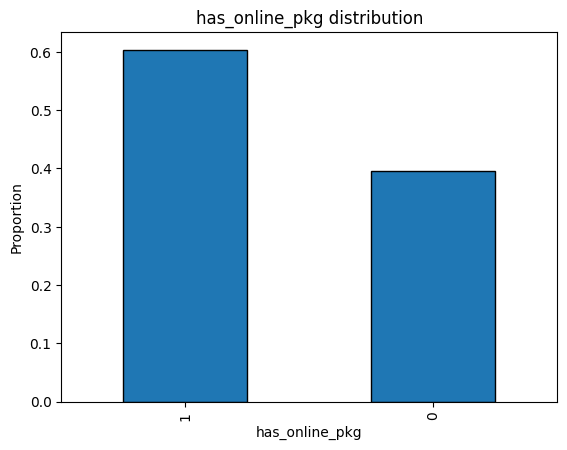

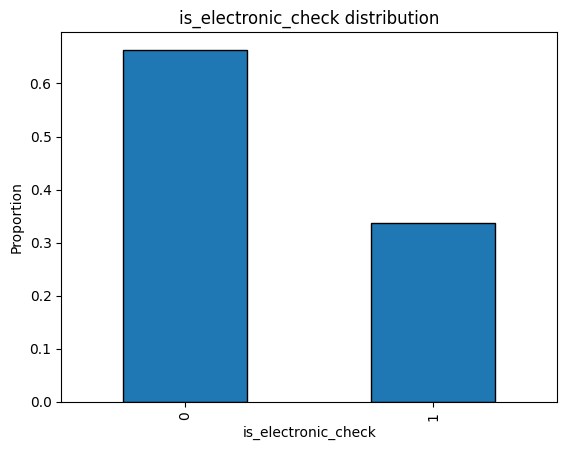

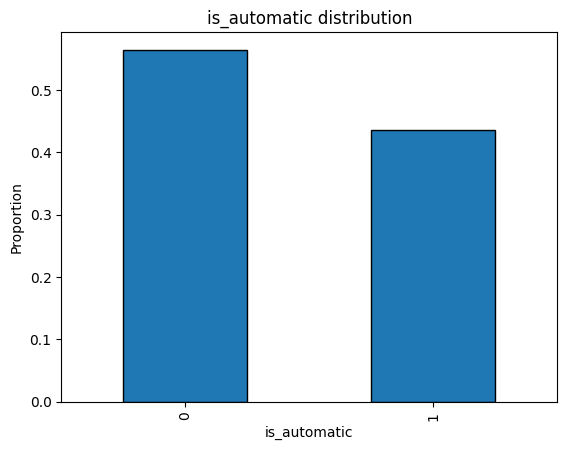

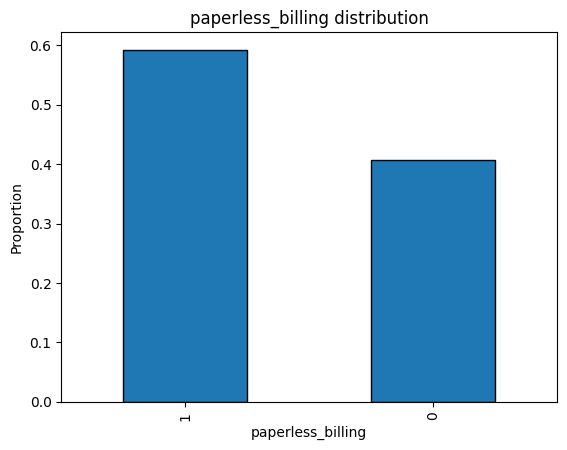

In [30]:
# 4. Distribution of engineered categorical features
for col in categorical_cols:
    plot_categorical_distribution(df_feat, col)


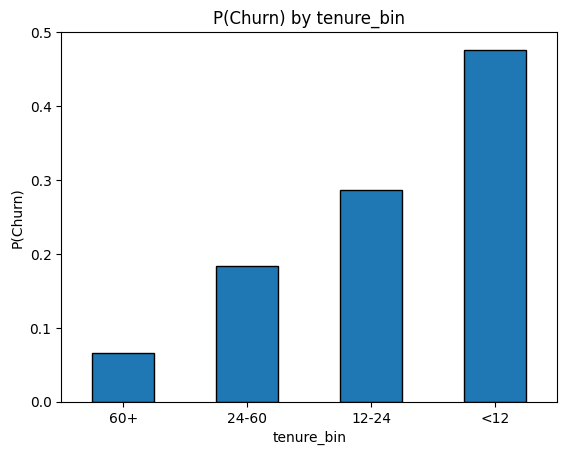

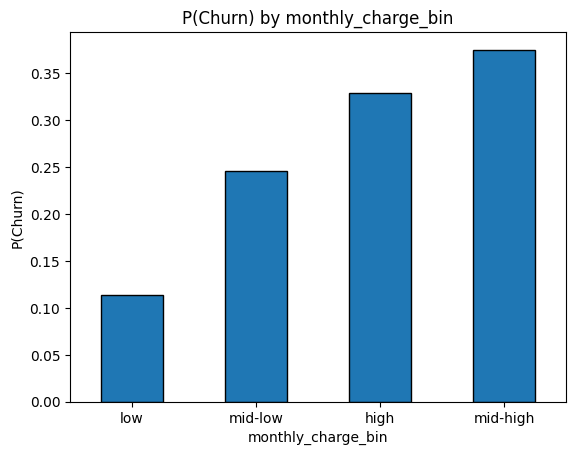

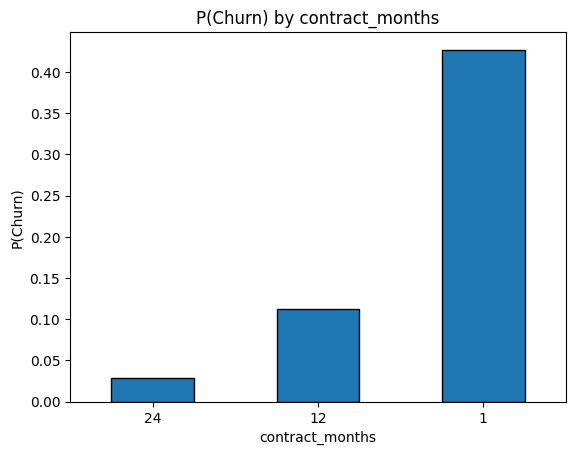

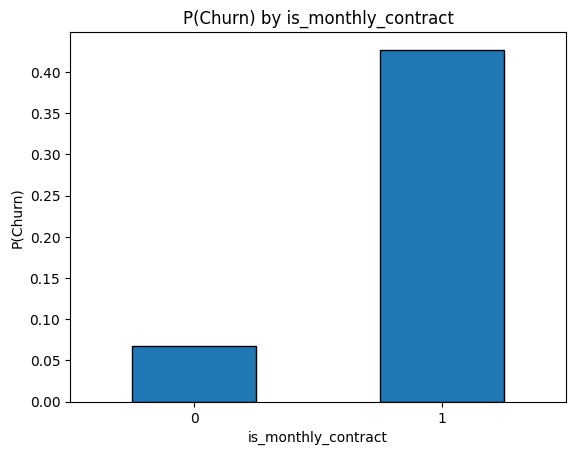

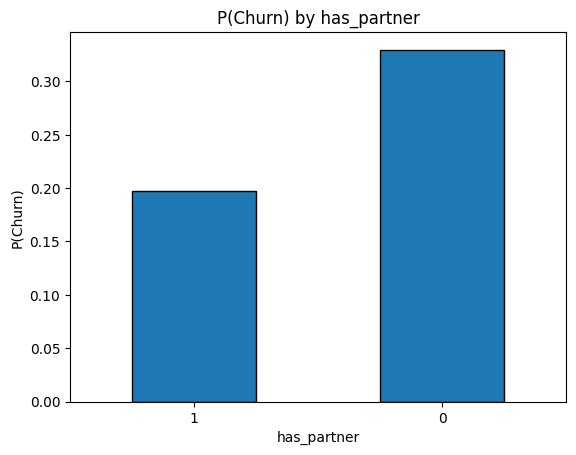

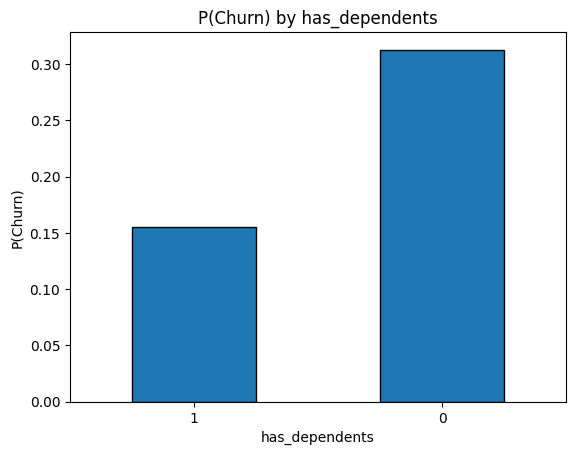

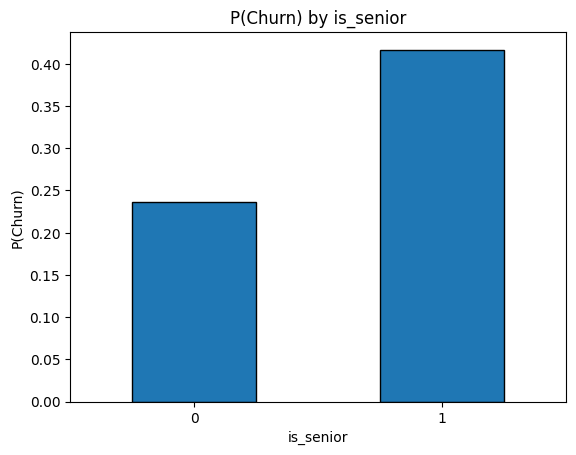

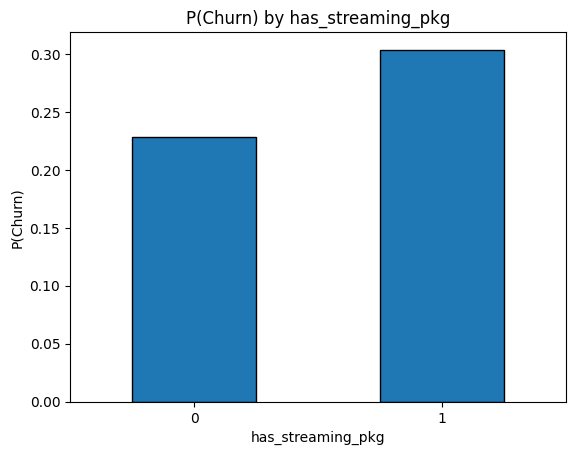

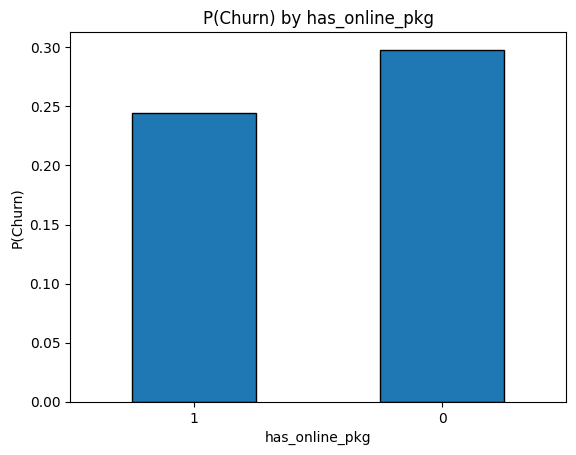

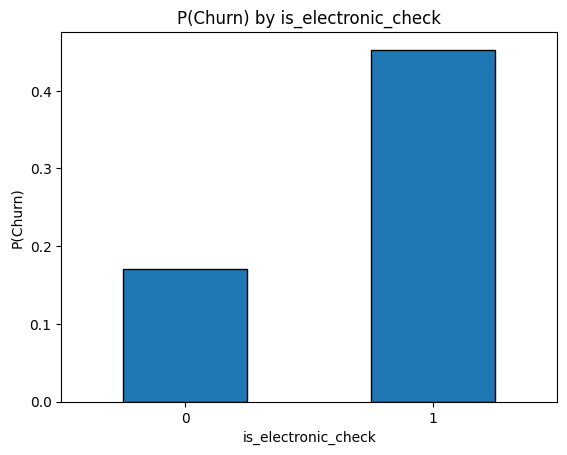

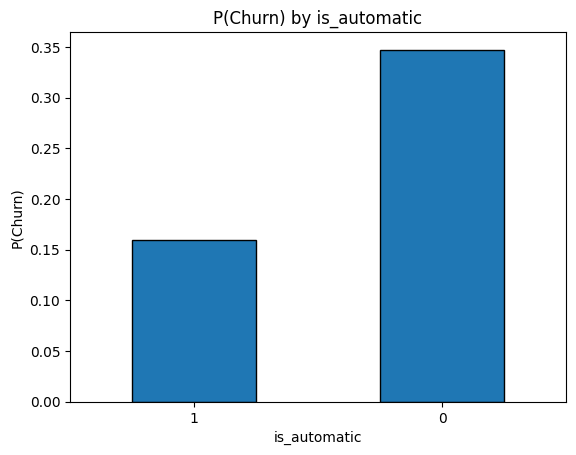

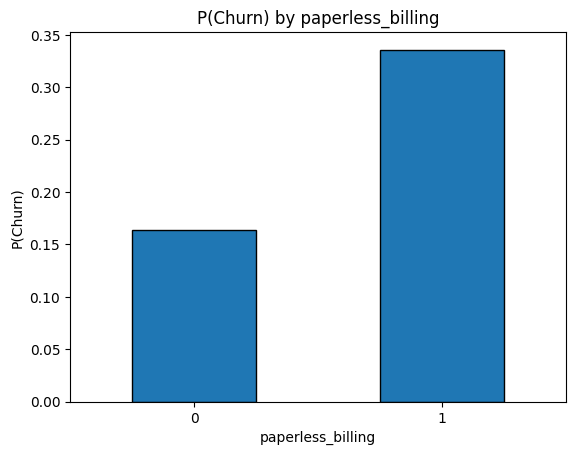

In [31]:
# 5. Churn rate by categorical feature
plot_categorical_vs_target(df_feat, categorical_cols, target="Churn")

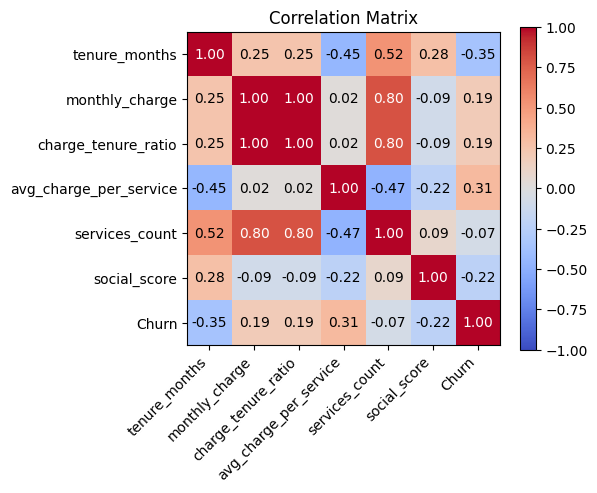

In [33]:
# 6. Correlation matrix for numerical features
plot_correlation_matrix(df_feat, cols=numeric_cols + ["Churn"])

# 5.0 Model Benchmark & Cross-Validation 

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151

=== Model leaderboard (test set) ===
        model   auc  accuracy    f1  precision  recall  log_loss  train_secs
GradientBoost 0.834     0.792 0.563      0.636   0.505     0.430        1.58
     AdaBoost 0.832     0.789 0.557      0.630   0.500     0.528        0.43
       LogReg 0.830     0.791 0.555      0.640   0.489     0.433        2.98
     CatBoost 0.828     0.790 0.565      0.627   0.513     0.436        5.22
      XGBoost 0.821     0.778 0.539      0.600   0.489     0.450      211.52
     Light

<Figure size 600x500 with 0 Axes>

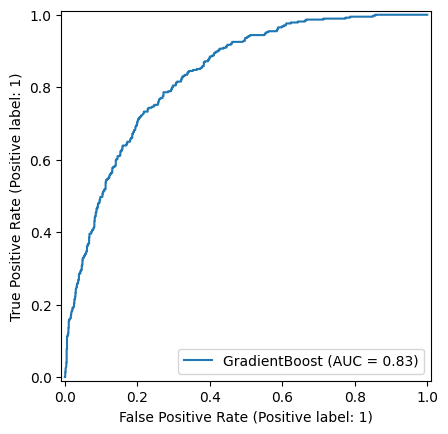

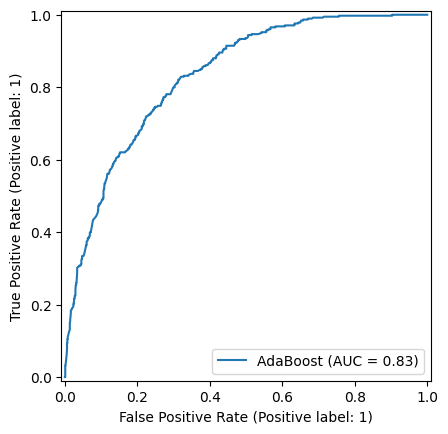

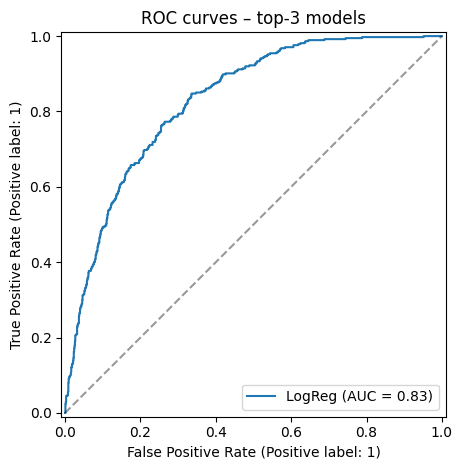

In [20]:
perf = evaluate_models(df_feat, num_cols, cat_cols, target_col="Churn")

# 6.0 Hyper-Parameter Tuning

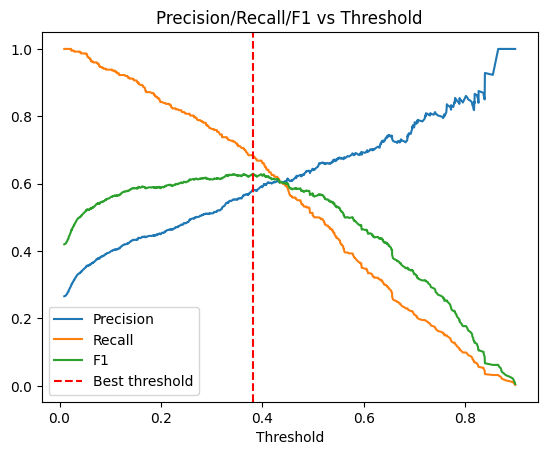


=== Test metrics (with tuned threshold) ===
  AUC   F1  Precision  Recall  Log-loss  Threshold  Train_sec                                                                 Best_params
0.835 0.63      0.583   0.684     0.427      0.381      58.65 {'clf__learning_rate': 0.05, 'clf__max_depth': 2, 'clf__n_estimators': 300}


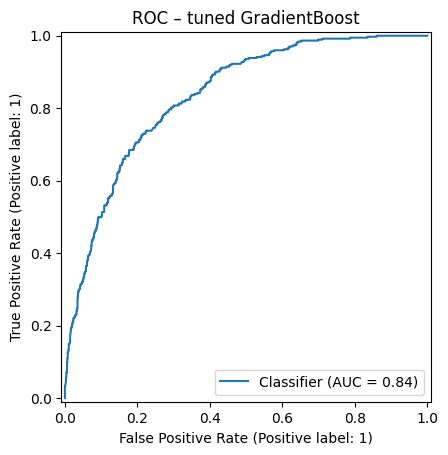

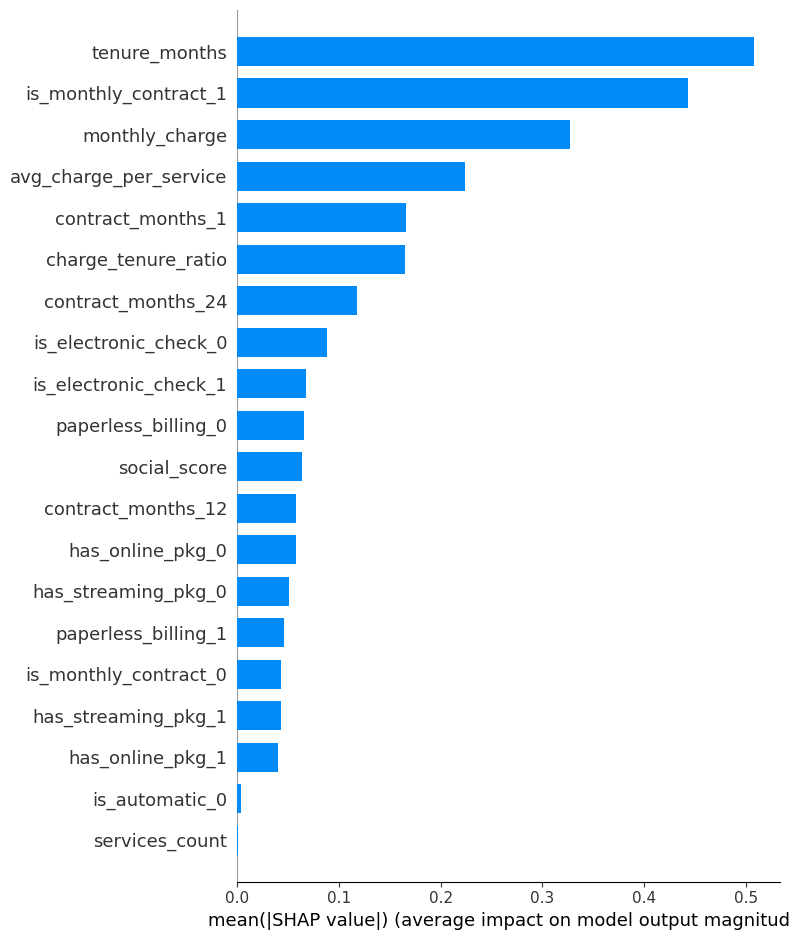

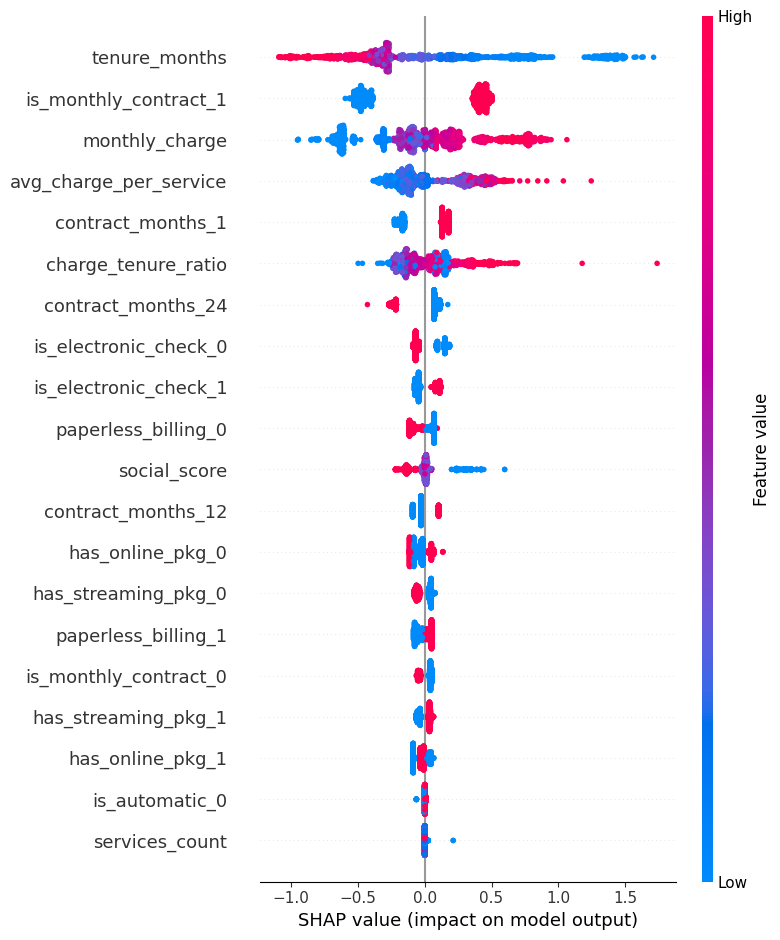

In [70]:
metrics_df, best_pipe, best_thr, y_te, y_prob = tune_and_explain(
    df_feat, num_cols, cat_cols, target_col="Churn", test_size=0.20, threshold_objective="f1"
)


# 7.0 Business Sizing & Impact

In [ ]:
BASE_CUSTOMERS   = df["customerID"].nunique()
CHURNERS_REAL    = df.loc[df["Churn"] == 1, "customerID"].nunique()
CHURN_RATE       = CHURNERS_REAL / BASE_CUSTOMERS
ARPU             = df["TotalCharges"].sum() / df["tenure"].sum()    # avg monthly
LTV_12M          = ARPU * 12                                        # 12-month LTV

COST_PER_CONTACT = 10       # $ per customer contacted
SUCCESS_RATE     = 0.30     # % of contacted churners you actually retain

In [ ]:
bi.CHURNERS_REAL      = CHURNERS_REAL        
bi.COST_PER_CONTACT   = COST_PER_CONTACT     
bi.SUCCESS_RATE       = SUCCESS_RATE         
bi.LTV_12M            = LTV_12M              

In [71]:
scenarios = [
    {"label": "Baseline (thr=0.50)",    "recall": 0.527, "precision": 0.648},
    {"label": "Fine-tuned (thr=0.50)",  "recall": 0.516, "precision": 0.612},
    {"label": "Fine-tuned (thr=0.424)", "recall": 0.655, "precision": 0.612},
    {"label": "Fine-tuned (thr=0.381)", "recall": 0.684, "precision": 0.583}
]

In [72]:
impact_results = []
for sc in scenarios:
    impact = bi.scenario_impact(sc["recall"], sc["precision"])
    impact["Scenario"] = sc["label"]
    impact_results.append(impact)

In [73]:
display(impact_results)

[{'Recall': 0.527,
  'Precision': 0.648,
  'Churners caught': 984,
  'Contacts': 1520,
  'Cost ($)': 15200.0,
  'Revenue saved ($)': np.float64(249717.0),
  'ROI (×)': np.float64(16.4),
  'Scenario': 'Baseline (thr=0.50)'},
 {'Recall': 0.516,
  'Precision': 0.612,
  'Churners caught': 964,
  'Contacts': 1575,
  'Cost ($)': 15758.0,
  'Revenue saved ($)': np.float64(244505.0),
  'ROI (×)': np.float64(15.5),
  'Scenario': 'Fine-tuned (thr=0.50)'},
 {'Recall': 0.655,
  'Precision': 0.612,
  'Churners caught': 1224,
  'Contacts': 2000,
  'Cost ($)': 20003.0,
  'Revenue saved ($)': np.float64(310370.0),
  'ROI (×)': np.float64(15.5),
  'Scenario': 'Fine-tuned (thr=0.424)'},
 {'Recall': 0.684,
  'Precision': 0.583,
  'Churners caught': 1278,
  'Contacts': 2192,
  'Cost ($)': 21928.0,
  'Revenue saved ($)': np.float64(324111.0),
  'ROI (×)': np.float64(14.8),
  'Scenario': 'Fine-tuned (thr=0.381)'}]